In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


In [2]:
def prec_recall(y_test,y_pred):
    precision=dict()
    recall=dict()
    for i in range(8):
        precision[i], recall[i], _ =precision_recall_curve(y_test[:, i],y_pred[:, i])
    lines = []
    labels = []
    colors=['cyan','green','red','yellow','magenta','blue','black','brown']
    for i, color in zip(range(8), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=3)
        lines.append(l)
        labels.append('Precision-recall for class {0}'''.format(i+1))
    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall')
    plt.show(lines, labels)

In [3]:
def roc(y_test,y_pred):
    lines=[]
    labels=[]
    fpr = dict()
    tpr = dict()
    colors=['cyan','green','red','yellow','magenta','blue','black','brown']
    for i in range(8):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        
    for i, color in zip(range(8), colors):
        l, = plt.plot(fpr[i], tpr[i], color=color, lw=3)
        lines.append(l)
        labels.append('ROC Curve for class {0}'''.format(i+1))
    fig1 = plt.gcf()
    fig1.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC curve')
    plt.legend(lines, labels, loc=(0, -1.25), prop=dict(size=14))

    

In [4]:
def model(x_train,y_train,x_test,y_test):
    print("Model : Logistic Regression")
    param_grid={'solver':['liblinear','newton-cg','sag','saga','lbfgs'],'max_iter':[10000]}
    grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
    grid.fit(x_train,y_train)
    y_test_pred=grid.predict(x_test)
    print(grid.best_params_)
    acc_test=round(accuracy_score(y_test_pred,y_test),4)*100
    print("Accuracy of Model  on test set : ",acc_test)
    print('Classification Report :')
    print(classification_report(y_test,y_test_pred,digits=8))
    con_mat=confusion_matrix(y_test,y_test_pred,labels=[1,2,3,4,5,6,7,8])
    print("Confusion Matrix of Model on test set : ")
    print(con_mat)
    print("The total correctly classified data : ",np.trace(con_mat))
    classifier=OneVsRestClassifier(LogisticRegression(solver=grid.best_params_['solver'],max_iter=10000))
    y_pred=classifier.fit(x_train, y_train).decision_function(x_test)
    y_pred1=classifier.fit(x_train,y_train).predict_proba(x_test)
    y_test1=label_binarize(y_test, classes=[1,2,3,4,5,6,7,8])
    print('Precision-Recall Curve')
    prec_recall(y_test1,y_pred1)
    print('ROC Curve')
    roc(y_test1,y_pred1)

    
    

Model : Logistic Regression
{'max_iter': 10000, 'solver': 'saga'}
Accuracy of Model  on test set :  96.66
Classification Report :
              precision    recall  f1-score   support

           1  0.98228128 1.00000000 0.99106145       887
           2  1.00000000 1.00000000 1.00000000       883
           3  0.95504386 0.99202733 0.97318436       878
           4  0.99271845 0.92013498 0.95504962       889
           5  0.98449612 0.99775533 0.99108138       891
           6  0.85236220 0.99198167 0.91688724       873
           7  0.99202128 0.84772727 0.91421569       880
           8  0.99763872 0.98370198 0.99062134       859

    accuracy                      0.96661932      7040
   macro avg  0.96957024 0.96666607 0.96651263      7040
weighted avg  0.96968570 0.96661932 0.96655058      7040

Confusion Matrix of Model on test set : 
[[887   0   0   0   0   0   0   0]
 [  0 883   0   0   0   0   0   0]
 [  1   0 871   5   0   1   0   0]
 [ 14   0  36 818   0  20   1   0]
 [  0  

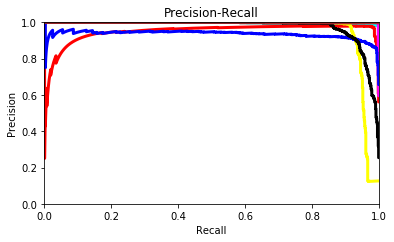

ROC Curve


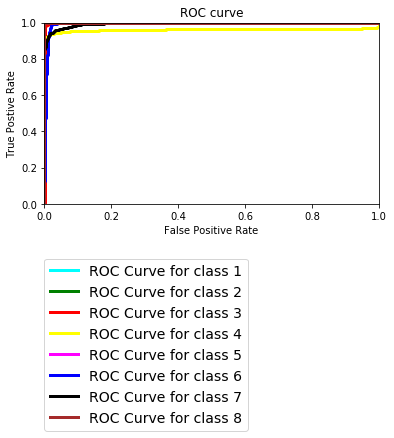

In [5]:
if __name__ == '__main__':
    train=pd.read_excel('S11_emgdata/S11_trainset_P135_70.xls')  #reading the xls file into dataframe
    test=pd.read_excel('S11_emgdata/S11_testset_P12345_30.xls')
    
    x_tr=train.drop(43,axis=1)    #separating the target values
    y_tr=train[43]
    x_te=test.drop(43,axis=1)
    y_te=test[43]
    
    x_train=x_tr.to_numpy()        # converting dataframe to numpy array
    y_train=y_tr.to_numpy()
    x_test=x_te.to_numpy()
    y_test=y_te.to_numpy()
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)       #standardizing the features for better traing process
    x_test=sc.fit_transform(x_test)
    model(x_train,y_train,x_test,y_test)
    
    